In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [29]:
#Load dataset

df = pd.read_csv('diabetes_data_upload.csv')
df = pd.DataFrame(df)
print("Size of Flaredown data or df is",df.shape,df.dtypes)#Display the amount object and variables


Size of Flaredown data or df is (520, 17) Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object


In [30]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

<AxesSubplot:>

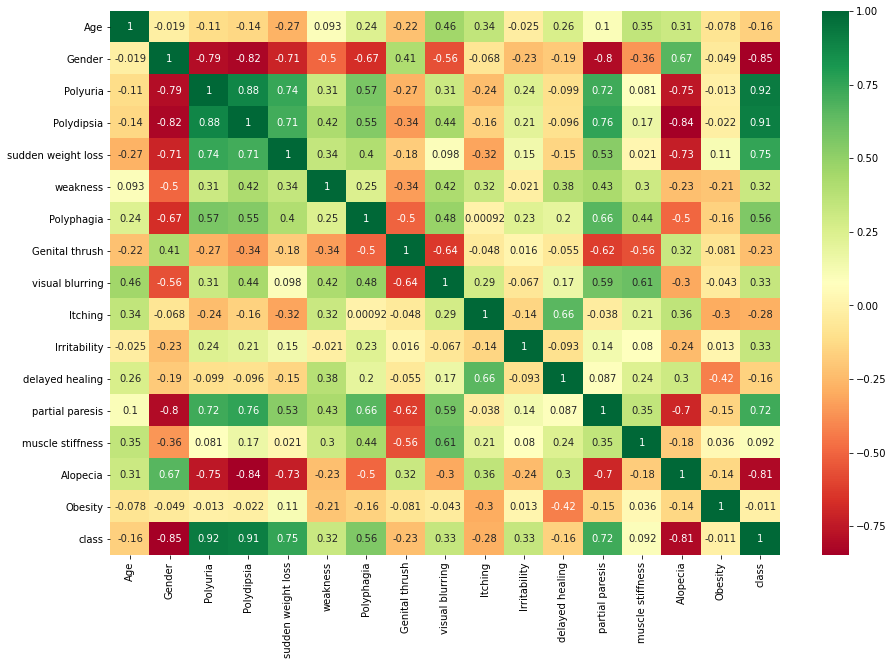

In [6]:
#Correlation graph

cor_mat = df.corr()
plt.figure(figsize=(15,10))
top_corr_features = cor_mat.index
sns.heatmap(cor_mat[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
df.rename(columns={'class': 'diabetes'}, inplace=True)
df.rename(columns={'sudden weight loss': 'sudden_weight_loss'}, inplace=True)


In [32]:
profile =ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [103]:

diabetes = df.diabetes.value_counts()
display(diabetes)

age = dfp.Age.value_counts()
display(age)

Polyuria = df.Polyuria.value_counts()
display(Polyuria)

Polydipsia = df.Polydipsia.value_counts()
display(Polydipsia)


sudden_weight_loss = df.sudden_weight_loss.value_counts()
display(sudden_weight_loss)

1    320
0    200
Name: diabetes, dtype: int64

48    28
35    27
55    20
39    15
40    14
50    13
38    13
58    11
47    10
45    10
43    10
60    10
53     9
54     9
68     9
57     9
66     8
61     7
62     7
30     7
49     6
28     5
69     5
41     4
56     4
42     3
70     3
36     3
67     3
32     3
37     3
31     3
63     3
65     3
52     3
33     2
25     2
90     2
44     2
85     2
51     2
72     2
46     1
34     1
59     1
64     1
79     1
16     1
Name: Age, dtype: int64

0    262
1    258
Name: Polyuria, dtype: int64

0    287
1    233
Name: Polydipsia, dtype: int64

0    303
1    217
Name: sudden_weight_loss, dtype: int64

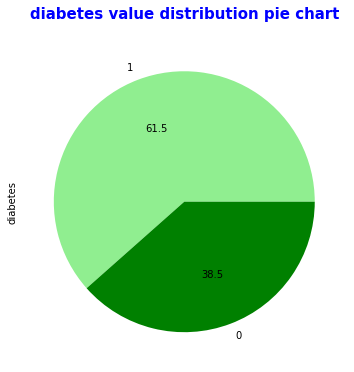

In [33]:
plt.figure(figsize = (10,6))
diabetes.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'green'])
plt.title("diabetes value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'blue', 'weight' : 'bold'})
plt.show()

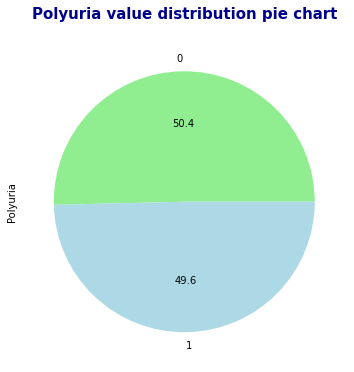

In [69]:
#Polyuria value distribution pie chart
plt.figure(figsize = (10,6))
Polyuria.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("Polyuria value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

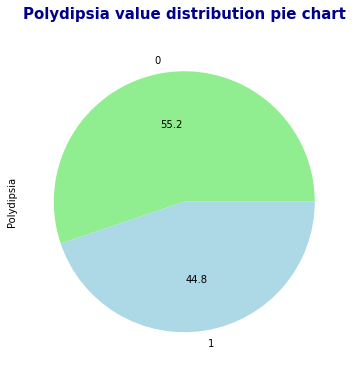

In [63]:
#Polydipsia value distribution pie chart
plt.figure(figsize = (10,6))
Polydipsia.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("Polydipsia value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

In [66]:
df.sudden_weight_loss

0      0
1      0
2      0
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: sudden_weight_loss, Length: 520, dtype: int64

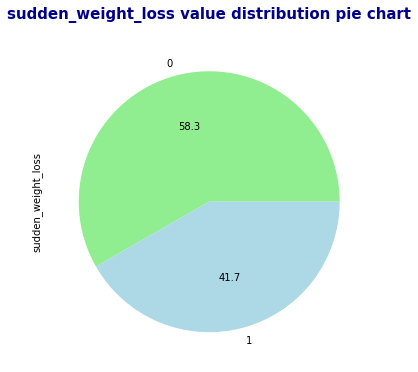

In [70]:
#sudden_weight_loss value distribution pie chart
plt.figure(figsize = (10,6))
sudden_weight_loss.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("sudden_weight_loss value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

<AxesSubplot:xlabel='diabetes', ylabel='Age'>

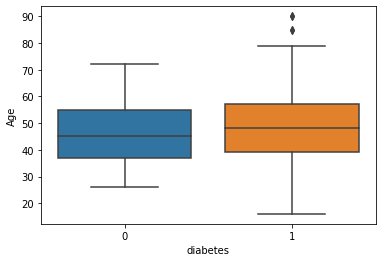

In [81]:
#Age range distribution chart
sns.boxplot(x='diabetes',y='Age',data=df)


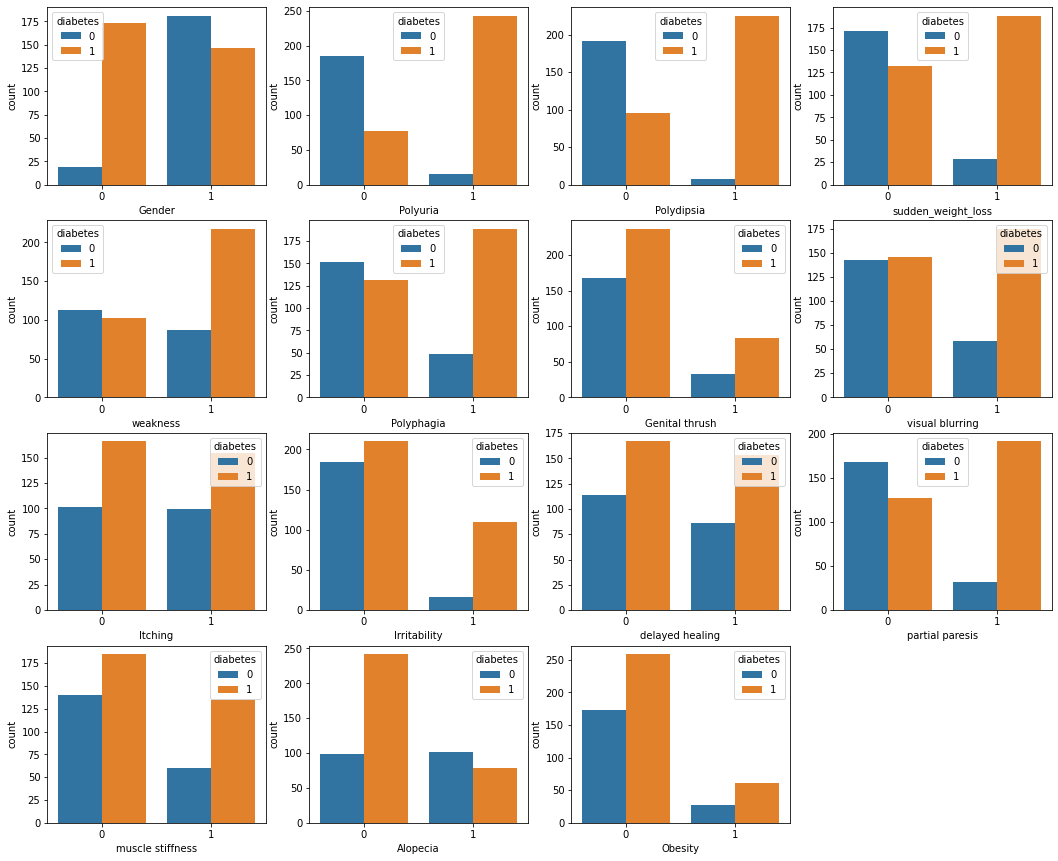

In [79]:
plt.figure(figsize=(18,15))
m=1
for i in df.columns[1:-1]:
    plt.subplot(4,4,m)
    m+=1
    sns.countplot(x=i,data=df,hue='diabetes')

In [101]:

dfp = pd.read_csv('Positive1.csv')
df = pd.DataFrame(dfp)

In [84]:
# Separating  independent and dependent variables

X = df.drop(['diabetes'],axis=1)
y = df['diabetes']

In [85]:
#identifyng best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']
print(featureScores.nlargest(16,'Score'))

              features       Score
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden_weight_loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571
5             weakness   12.724262
7       Genital thrush    4.914009
13    muscle stiffness    4.875000
15             Obesity    2.250284
11     delayed healing    0.620188
9              Itching    0.047826


In [96]:
# Splitting the dataframe into training and testing
X = df[['Polydipsia','Polyuria','sudden_weight_loss','partial paresis','Gender','Irritability','Polyphagia','Alopecia']]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True) 

### Model Selection

In [97]:
# Evaluating the model using k-fold cross validation
rf = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(rf, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy : '+ str(mean(scores))+' Std Deviation :'+str(std(scores)))
print(scores)

Accuracy : 0.9418956123139897 Std Deviation :0.014978030697985702
[0.96296296 0.93069307 0.94845361 0.94736842 0.92      ]


In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

#LogisticRegression	
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [99]:
model_acc = []
models = [lr,rf]

for i in models:
    i.fit(X_train,Y_train)
    model_acc.append(accuracy_score(y_test,i.predict(X_test)))
                      
models = pd.DataFrame({'Models':models,'Accuracy':model_acc})

In [100]:
models = models.sort_values(by=['Accuracy'],ascending=False).reset_index().drop('index',axis=1)
best = models['Models'][0]
models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
models

Models  Accuracy
0  RandomForestClassifier  0.951923
1      LogisticRegression  0.923077